In [51]:
import csv
import networkx as nx
import matplotlib.pyplot as plt

In [54]:
def csvToList(f):
    """
    Converts CSV file into 2D list format.
    :param f (str): The CSV to be converted.
    :return: 2D list
    """
    with open(f, 'r') as file:
        csvData = list(csv.reader(file))
        rowNum = len(csvData)
        colNum = len(csvData[0])
        mazeList = [[0 for i in range(colNum)] for j in range(rowNum)]
        for i in range(rowNum):
            colNum = len(csvData[i])
            for j in range(colNum):
                mazeList[i][j] = csvData[i][j]
    return mazeList

def validateMaze(mazeList):
    """
    Validates if a 2D list is a maze by checking if the following rules are passed:
    - There must be a start and end point.
    - There can be no more than one start point.
    - There can be no more than one end point.
    :param mazeList: The 2D list to be validated.
    :return: validation (bool), errors (str)
    """
    validation = True
    errors = ""
    startCount = 0
    endCount = 0
    for i in range(len(mazeList)):
        for j in range(len(mazeList[0])):
            if mazeList[i][j] == "S":
                startCount += 1
            elif mazeList[i][j] == "E":
                endCount += 1
    if startCount == 0 or endCount == 0:
        validation = False
        errors += "There must be a start and end point.\n"
    if startCount > 1:
        validation = False
        errors += "There can be no more than one start point.\n"
    if endCount > 1:
        validation = False
        errors += "There can be no more than one end point.\n"
    return validation, errors

def displayMaze(mazeList):
    """
    Print out a 2D list in the format of a Maze.
    :param mazeList (list): The 2D list to be printed.
    """
    row = ""
    for i in range(len(mazeList)):
        for j in range(len(mazeList[0])):
            if row != "":
                row += " "
            if mazeList[i][j] == "":
                row += " "
            else:
                row += str(mazeList[i][j])
        print(row)
        row = ""

def listToNetworkXGraph(mazeList):
    """

    :return: graph, startPoint, endPoint
    """
    G = nx.grid_2d_graph(len(mazeList),len(mazeList[0]))
    return G

W W W W W W          
W         W W W W W W
W S W W             W
W                   W
W W W W W W W   W   W
W           W   W   W
W           W   W   W
W           W   W   W
W                   W
W   W W W W W   W   W
W           W   W   W
W           W   W   W
W                   W
W                   W
W             E     W
W W W W W W W W W W W


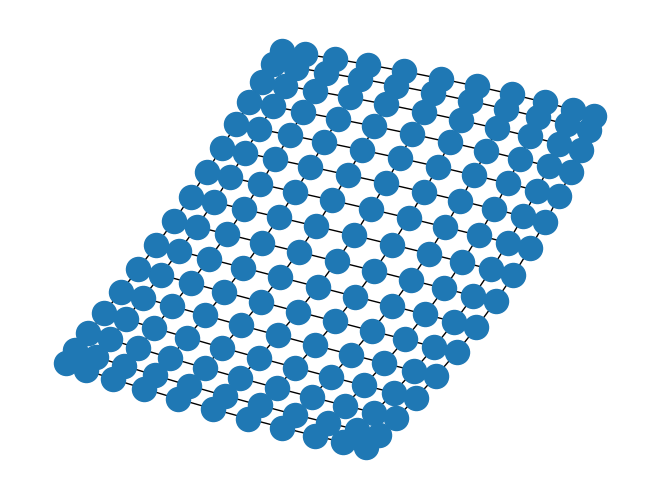

In [75]:
with open('NavMazeExample.csv', 'r') as file:
    mazeList = csvToList("NavMazeExample.csv")
    validation = validateMaze(mazeList)
    if validation[0]:
        displayMaze(mazeList)
        G = listToNetworkXGraph(mazeList)
        pos = nx.spring_layout(G, iterations=500, seed=39775)
        nx.draw(G,pos)
        plt.show()
    else:
        print(validation[1])
        exit()
